In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # add parent folder to path
from flow import Paths
from figures.demoplots import plot_bayes, scatter_post
Folder, _, _, Subjects = Paths.ExpData(fig_subfolder = 'learning')

### Decrease in resource requirements as a function of learning

In the context of the experimental task we can assume that the both participants' observations and internal representations of stimuli are noisy and therefore inferred probabilistically. This is a standard statistical learning framework plotted on a figure below: participants' internal representations of the current stimulus (the posterior distribution $p(z|y)$, green) reflect the combination of the stimulus noise (the likelihood distribution $p(y|z)$, blue) and the history of previous stimuli in the task (prior distribution $p(z)$, orange).

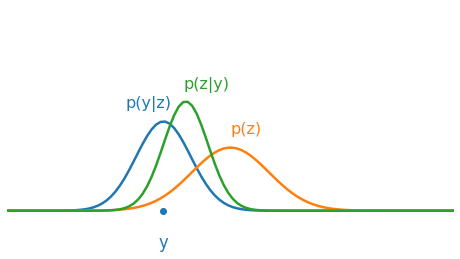

In [41]:
mu = [-3, 0]
s = [1.5, 3]
Y = plot_bayes(mu, s)

The variance/precision of the prior distribution indicates how much learning has occurred: a flat prior makes no prediction, while a peaked prior makes a strong one. It follows, that given the same stimuli (constant measurement/likelihood noise; blue line on figure) the change in the posterior variance (green) indicates the effect of learning. 

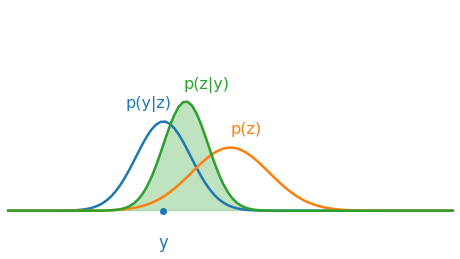

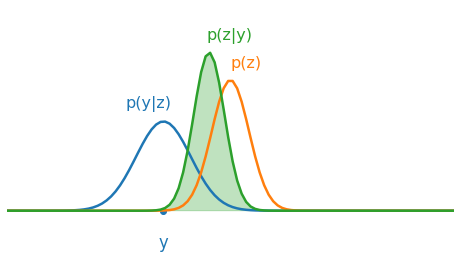

In [42]:
%autoreload demoplots
mu = [-3, 0]
s = [1.5, 3]
Y = plot_bayes(mu, s, fill_posterior=True)

mu = [-3, 0]
s = [1.5, 0.7]
Y = plot_bayes(mu, s, fill_posterior=True)

The relationship between learning and posterior variance allows to quantify the effect of learning on a neural population code. As the posterior variance increases more resources are required to encode the distribution with a neural population, and vice versa. Intuitively, this means that a sharp response distribution can be represented with fewer population units, whilst a flat response distribution requires more units' responses to encode.

Formally, the number of bits required to encode a response of a single population unit $x$ is equal to the inverse of the probability of its response: 
$$I_x = \frac{1}{p(z_x|y)} = -log_2(p(z_x|y)) ,$$ 

and averaging this across the whole population:
$$H_x = - \sum p(z_x|y) log_2(p(z_x|y)) .$$ 

Therefore, the number of bits required to encode a high-variance response is greater compared to a low-variance, sharply peaking response:

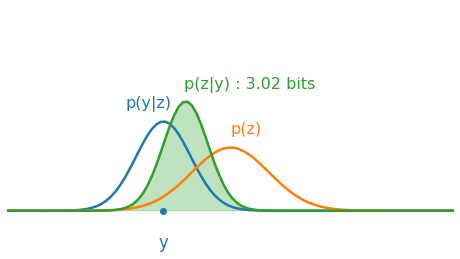

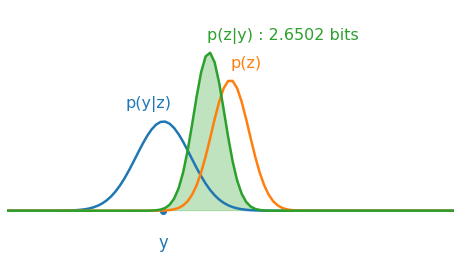

In [44]:
%autoreload demoplots
mu = [-3, 0]
s = [1.5, 3]
Y = plot_bayes(mu, s, fill_posterior=True, display_bits=True)

mu = [-3, 0]
s = [1.5, 0.7]
Y = plot_bayes(mu, s, fill_posterior=True, display_bits=True)

Here we assume a canonical neural population of units where each unit has a tuning function: it's response is characterised by a parametric distribution with a mean and variance. For equally distributed tuning means the response magnitudes of units follow the posterior distribution ($p(z|y)$ on the figure above, green line): 

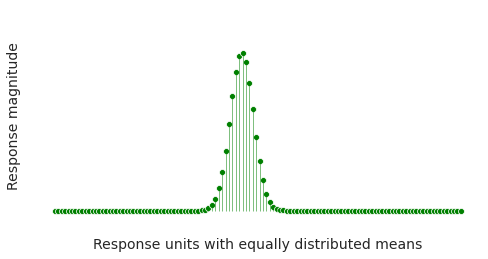

In [53]:
%autoreload demoplots
scatter_post(Y[0][2], Y[1][2]);

Hence, the sum of responses (total activity) of a neural population should decrease with learning as the variance gets reduced. The decrease in activity should in turn lower metabolic costs and with it the BOLD response.

This prediction rests on two assumptions:

(1) Neural activity has a ceiling: the response magnitude cannot increase infintely. In other words, as response distributions become sharper, unit's response magnitudes asymptote.

(2) The eigenspectrum of the dimensionality of the neural population decays: response units are not orthogonal to each other or completely linearly correlated.

For both assumptions and detailed discussion see Gao et al., 2017 [1].

Reduced variance (or SNR increase) in the neural population code is exactly what we predict with the associative learning mechanism: the variance in neural sequence representations should decrease as a function of learning because the prior distribution over associations becomes sharper reducing the number of bits required to encode the posterior. However, we test this prediction not at the level of univariate fMRI magnitude but in terms of the change in fMRI pattern similarity, see [notebooks_rev/sim_fmri.ipynb].

In sum, it should holds for all variants of statistical / probabilistic learning, that if the variance of the posterior distribution is increased, the total response of the population should increase and vice versa.

[1] Gao, P., Trautmann, E., Yu, B. M., Santhanam, G., Ryu, S. I., Shenoy, K. V., & Ganguli, S. (2017). A theory of multineuronal dimensionality, dynamics and measurement. BioRxiv, 214262. https://doi.org/10.1101/214262